Total features: 425,984
Features activated at least once: 422,514 (99.2%)
Total sentences processed: 26,344

Activated features statistics:
  Mean activations: 1728.4
  Median activations: 771.0
  Min activations: 1
  Max activations: 26344
  Std activations: 2776.5


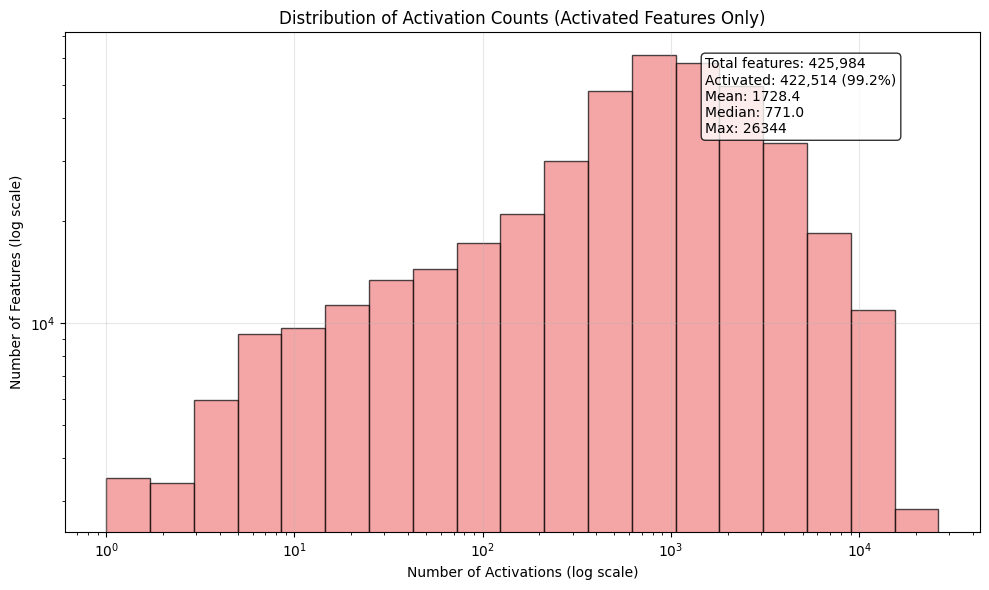

In [16]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the quantiles data
with open('gemma_sae_quantiles.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract feature activation counts
activation_counts = np.array(data['feature_activation_counts'])

# Print basic statistics
total_features = len(activation_counts)
activated_features = (activation_counts > 0).sum()
print(f"Total features: {total_features:,}")
print(f"Features activated at least once: {activated_features:,} ({100*activated_features/total_features:.1f}%)")
print(f"Total sentences processed: {data['total_sentences_processed']:,}")

# Statistics for activated features only
activated_counts = activation_counts[activation_counts > 0]
if len(activated_counts) > 0:
    print(f"\nActivated features statistics:")
    print(f"  Mean activations: {activated_counts.mean():.1f}")
    print(f"  Median activations: {np.median(activated_counts):.1f}")
    print(f"  Min activations: {activated_counts.min()}")
    print(f"  Max activations: {activated_counts.max()}")
    print(f"  Std activations: {activated_counts.std():.1f}")

# Create histogram for activated features only
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Only show activated features (excluding zeros)
if len(activated_counts) > 0:
    # For activated features only, use log-spaced bins from 1 to max
    max_activated = activated_counts.max()
    bins_activated = np.logspace(0, np.log10(max_activated), 20)
    
    ax.hist(activated_counts, bins=bins_activated, alpha=0.7, color='lightcoral', edgecolor='black')
    ax.set_xlabel('Number of Activations (log scale)')
    ax.set_ylabel('Number of Features (log scale)')
    ax.set_title('Distribution of Activation Counts (Activated Features Only)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, alpha=0.3)
    
    # Add text with statistics for activated features
    ax.text(0.7, 0.95, f'Total features: {total_features:,}\nActivated: {activated_features:,} ({100*activated_features/total_features:.1f}%)\nMean: {activated_counts.mean():.1f}\nMedian: {np.median(activated_counts):.1f}\nMax: {activated_counts.max()}', 
             transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
else:
    ax.text(0.5, 0.5, 'No activated features', transform=ax.transAxes, 
             horizontalalignment='center', verticalalignment='center', fontsize=16)
    ax.set_title('Distribution of Activation Counts (Activated Features Only)')

plt.tight_layout()
plt.show()

In [17]:
# Get information about specific feature L19, F07204
layer_idx = 19
feat_idx = 7204

print(f"Information for Feature L{layer_idx:02d}, F{feat_idx:05d}:")
print("=" * 50)

# Calculate global feature index
global_feat_idx = layer_idx * 16384 + feat_idx  # 16384 features per layer
print(f"Global feature index: {global_feat_idx}")

# Get activation count
activation_count = data['feature_activation_counts'][global_feat_idx]
print(f"Activation count: {activation_count:,} out of {total_sentences:,} sentences")

# Calculate frequency
total_sentences = data['total_sentences_processed']
frequency = activation_count / total_sentences
print(f"Activation frequency: {frequency:.6f} ({100*frequency:.3f}%)")

# Get quantile estimates
quantiles = data['quantiles'][layer_idx][feat_idx]
print(f"\nQuantile estimates:")
print(f"  r=0.1   (10%):   {quantiles[0]:.6f}")
print(f"  r=0.01  (1%):    {quantiles[1]:.6f}")
print(f"  r=0.001 (0.1%):  {quantiles[2]:.6f}")



Information for Feature L19, F07204:
Global feature index: 318500
Activation count: 592 out of 23,184 sentences
Activation frequency: 0.022472 (2.247%)

Quantile estimates:
  r=0.1   (10%):   26.685246
  r=0.01  (1%):    52.598110
  r=0.001 (0.1%):  54.972210


In [18]:
# Get information about specific feature L19, F07204
layer_idx = 19
feat_idx = 12564

print(f"Information for Feature L{layer_idx:02d}, F{feat_idx:05d}:")
print("=" * 50)

# Calculate global feature index
global_feat_idx = layer_idx * 16384 + feat_idx  # 16384 features per layer
print(f"Global feature index: {global_feat_idx}")

# Get activation count
activation_count = data['feature_activation_counts'][global_feat_idx]
print(f"Activation count: {activation_count:,} out of {total_sentences:,} sentences")

# Calculate frequency
total_sentences = data['total_sentences_processed']
frequency = activation_count / total_sentences
print(f"Activation frequency: {frequency:.6f} ({100*frequency:.3f}%)")

# Get quantile estimates
quantiles = data['quantiles'][layer_idx][feat_idx]
print(f"\nQuantile estimates:")
print(f"  r=0.1   (10%):   {quantiles[0]:.6f}")
print(f"  r=0.01  (1%):    {quantiles[1]:.6f}")
print(f"  r=0.001 (0.1%):  {quantiles[2]:.6f}")



Information for Feature L19, F12564:
Global feature index: 323860
Activation count: 10,373 out of 26,344 sentences
Activation frequency: 0.393752 (39.375%)

Quantile estimates:
  r=0.1   (10%):   98.156509
  r=0.01  (1%):    98.112534
  r=0.001 (0.1%):  98.140434
